# Báo cáo đồ án môn "Lập trình song song ứng dụng"

Nhóm 5:
1. 1712718 - Huỳnh Thanh Sang - [GitHub](https://github.com/hts7117)
2. 1712683 - Phạm Hoàng Phương - [Github](https://github.com/superman19993)
3. 1712584 - Nguyễn Công Lý - [GitHub](https://github.com/conglyne222)

Link thùng chứa Github của nhóm: [Repo](https://github.com/superman19993/LTSSUD_1712718_1712683_1712584)


## Mô tả ứng dụng
  ### Object detection and Segmentation by Mask RCNN
  - Input: Ảnh đầu vào có kích thước W x H ![image.png](https://scontent.fsgn5-9.fna.fbcdn.net/v/t1.15752-9/277380635_662833644832542_6356397547685485335_n.jpg?_nc_cat=105&ccb=1-6&_nc_sid=ae9488&_nc_ohc=RBV_D7KGFtcAX-yCXgU&_nc_ht=scontent.fsgn5-9.fna&oh=03_AVIB-MIAm71Po3qz8YuewIS-pgMsgaE4hycSdBBq5lYzpw&oe=629E498B)
  - Output: Các bounding box: [cx, cy, w, h] (tọa độ tâm + kích thước) tại các vị trí nghi ngờ có cá thể ![image.png](https://scontent.fsgn5-3.fna.fbcdn.net/v/t1.15752-9/277262287_1207776213380954_9024006818679567261_n.jpg?_nc_cat=104&ccb=1-6&_nc_sid=ae9488&_nc_ohc=GZ5b3cepL64AX-jC-im&_nc_ht=scontent.fsgn5-3.fna&oh=03_AVL9lmjCMowwtTJ4Ws0N4Ywd2BHXzIyZR-pbXHZL2uQfnA&oe=629B4BBA)

  - Trong đề tài này, nhóm 5 lấy mô hình object detection and segmentation by Mask RCNN đã được huấn luyện từ trước để thực hiện tối ưu về thời gian chạy.
  - Mô hình trên được huấn luyện từ tập dữ liệu COCO (200.000 ảnh, 80 lớp, 1.500.000 cá thể).




  ### Lý do chọn đề tài: 
  - Bài toán sử dụng mạng CNN (liên quan đến tác vụ convolution trên ảnh).
  - Các tác vụ xử lý liên quan đến ảnh khác.

## Tổng quát về bài toán.



![image.png](https://scontent.fsgn5-2.fna.fbcdn.net/v/t1.15752-9/279651849_1165431594233833_7319179211099776832_n.png?_nc_cat=110&ccb=1-6&_nc_sid=ae9488&_nc_ohc=9Ja3PNyZpzkAX__dRcj&_nc_ht=scontent.fsgn5-2.fna&oh=03_AVJhK_8XEU4CD2x4VlIaoSBqIpSTX5d3JXq53zZ0622ocA&oe=629FB49F)



### Phát sinh ứng viên (Region Proposal)
- Đầu tiên các ảnh input đầu vào được đưa qua mạng rút trích đặc trưng Feature Pyramid Network (FPN*) để rút ra các feature map. Kích thước của feature map nhỏ hơn rất nhiều so với ảnh ban đầu, bù lại số channel tăng lên nên vẫn bảo toàn được thông tin cấu trúc ảnh.

![image.png](https://scontent.fsgn5-8.fna.fbcdn.net/v/t1.15752-9/279292201_5332166153502996_1418416441842780472_n.png?_nc_cat=109&ccb=1-6&_nc_sid=ae9488&_nc_ohc=rZkzpd5-AOgAX-BEfXM&tn=hWV3bc92ndaEf6Eh&_nc_ht=scontent.fsgn5-8.fna&oh=03_AVLd1VX1nX0Md5jHvqa5zcK7HAbHdNxNJZz2ZPa-kWTLQw&oe=629D2298)

(FPN*): là mô hình mạng được thiết kế ra để nâng cao độ chính xác đối với việc dò tìm các vật thể nhỏ.


- Sau đó sẽ duyệt trên từng ô của feature map một lần duy nhất, tại mỗi ô sẽ sinh ra k anchor box có kích thước cố định. Cách sinh anchor box này đảm bảo mô hình có thể nhận dạng được các cá thể thuộc mọi kích thước và hình dạng khác nhau.
- Minh họa anchor box k=9
![image.png](https://scontent.xx.fbcdn.net/v/t1.15752-9/277967659_2116324165207464_498970705263918862_n.png?_nc_cat=104&ccb=1-5&_nc_sid=aee45a&_nc_ohc=cWy5fHPVNbQAX8CY7ST&_nc_ad=z-m&_nc_cid=0&_nc_ht=scontent.xx&oh=03_AVJbspaszyA_gIFUTo7K9bOHaBzYPkXn7lLQqAQVchLLWA&oe=628762EA)


- Feature map đang xét sau đó được đưa vào RPN (Region Proposal Network) để kiểm tra từng anchor box có chứa vật thể không và tinh chỉnh anchor box đó. Những anchor box có chứa vật thể sẽ được làm bounding box ứng viên

![image.png](https://scontent.fsgn5-12.fna.fbcdn.net/v/t1.15752-9/278923162_1186205478811950_2237024756275600497_n.png?_nc_cat=102&ccb=1-6&_nc_sid=ae9488&_nc_ohc=98KtdUDP0UgAX9tuJ2L&_nc_ht=scontent.fsgn5-12.fna&oh=03_AVIdgzCMD6VWSMsmkhQrDZJr2SoXdQ8aYB9PLMAJmJQ4HQ&oe=629F81FF)

### Phân lớp (Classification)
- Sau đó các bounding box ứng viên sẽ được đưa qua ROI Align(*) để crop các feature map ở các ứng viên ra.

(*): ROI Align có cơ chế hoạt động tương tự với ROI pooling (Region of interest pooling) nhằm đảm bảo các feature map có kích thước cố định


- Phần feature map sau khi thực hiện ROIAlign sẽ được đưa vô một mạng fully-connected gồm 2 nhánh để tìm ra class id tương ứng với bounding box đầu vào và tinh chỉnh lại bounding box đầu vào để tăng độ chính xác. 



### Phân đoạn ảnh (Segmentation)
- Phần feature map có được từ bước trên sẽ được cho qua một 1 mạng Convolution với output có kích thước tổng số class x 28 x 28. Cuối cùng, lấy output thứ class_id (kết quả phân lớp) và resize lại cho kích thước ban đầu của bounding box ta được binary mask cần tìm.

![image.png](https://scontent.fsgn5-10.fna.fbcdn.net/v/t1.15752-9/276326941_805976757043351_2295426509047500211_n.png?_nc_cat=107&ccb=1-6&_nc_sid=ae9488&_nc_ohc=Jwo44j-VR5AAX9hwcTZ&_nc_ht=scontent.fsgn5-10.fna&oh=03_AVKgw9mR0To7QFYrVblZqi9VXz6W5YhB3ACyKcsOQGNhXw&oe=629D3395)

# Mask R-CNN inference stage
A quick intro to using the pre-trained model to detect and segment objects.

## Mount source code from Google Drive and choose tensorflow version

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/MyDrive/LTSS_UD_2/

/content/gdrive/MyDrive/LTSS_UD_2


In [3]:
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [4]:
!cp saving.py /tensorflow-1.15.2/python3.7/keras/engine

## Inference stage tham khảo

In [ ]:
%%time
!python inference.py

Using TensorFlow backend.


2022-05-24 14:47:01.938907: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2022-05-24 14:47:01.944980: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000140000 Hz
2022-05-24 14:47:01.945198: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6f97f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-24 14:47:01.945234: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-24 14:47:01.947050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-24 14:47:02.079566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-0

Populating the interactive namespace from numpy and matplotlib


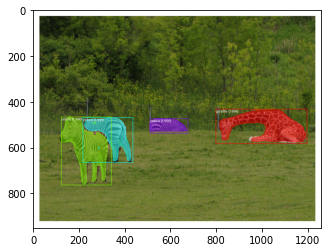

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output.png')
imgplot = plt.imshow(img)
plt.show()

## Sequential inference stage

###Không sử dụng jit

In [5]:
%%time
!python inference3.py

Using TensorFlow backend.


2022-05-25 08:50:41.006716: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-05-25 08:50:41.006915: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x67e1500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 08:50:41.006988: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 08:50:41.008677: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 08:50:41.234978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 08:50:41.235718: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x67e0a80 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Thời gian việc chạy hàm zeroPadding và Convolution không sử dụng jit là:
- ZeroPadding: 1.927199716999894 s
- Convolution: 6943.344113884999 s

Populating the interactive namespace from numpy and matplotlib


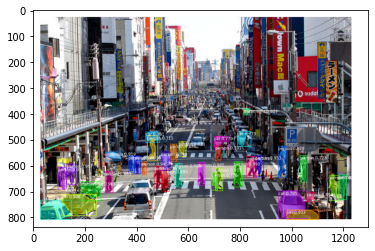

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output.png')
imgplot = plt.imshow(img)
plt.show()

###CÓ sử dụng Jit

In [7]:
%%time
!python inference3.py

Using TensorFlow backend.


2022-05-25 11:11:45.622825: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-05-25 11:11:45.623053: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6b13f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 11:11:45.623088: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 11:11:45.624716: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 11:11:45.847032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 11:11:45.847750: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6b14300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Thời gian việc chạy hàm zeroPadding và Convolution không sử dụng jit là:
- ZeroPadding: 1.8614802650008642 s
- Convolution: 9.502588012999695 s

##Song song hóa 2 hàm zeroPadding và Convolution

### Song song hóa version 1

In [18]:
%%time
!python parallel0.py

Using TensorFlow backend.


2022-05-25 07:04:06.351230: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-05-25 07:04:06.351433: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5a31f80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 07:04:06.351467: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 07:04:06.352986: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 07:04:06.558415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:04:06.559173: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5a32300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Thời gian việc chạy hàm zeroPadding và Convolution không sử dụng jit là:
- ZeroPadding: 0.17351316999975097 s
- Convolution: 16.520889763000014 s

###Song song hóa version 2

In [14]:
%%time
!python parallel1.py

Using TensorFlow backend.


2022-05-25 06:53:35.543990: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2022-05-25 06:53:35.544192: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x738ff80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-25 06:53:35.544224: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-25 06:53:35.545859: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-25 06:53:35.742849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 06:53:35.743627: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7390300 initialized for platform CUDA (this does not guarantee that XLA will be used). 

Thời gian việc chạy hàm zeroPadding và Convolution không sử dụng jit là:
- ZeroPadding: 0.17808602599961887 s
- Convolution: 3.247576571999616 s